# Here we will Work on Wine Quality test

##  First Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_validate
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Now Import datasets

In [43]:
redwine = pd.read_csv('winequality-red.csv',sep=';')
whitewine = pd.read_csv('winequality-white.csv',sep=';')

X_redwine = redwine.iloc[:,:11]
Y_redwine = redwine.iloc[:,11]

X_whitewine = whitewine.iloc[:,:11]
Y_whitewine = whitewine.iloc[:,11]
print(X_redwine.head())
print(Y_whitewine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    6
1

### Here we will Declare the quality

In [3]:
quality_redwine = redwine["quality"].values
category_redwine = []
for num in quality_redwine:
    if num<5:
        category_redwine.append("Bad")
    elif num>6:
        category_redwine.append("Good")
    else:
        category_redwine.append("Mid")

quality_whitewine = whitewine["quality"].values
category_whitewine = []
for num in quality_whitewine:
    if num<5:
        category_whitewine.append("Bad")
    elif num>6:
        category_whitewine.append("Good")
    else:
        category_whitewine.append("Mid")


### Create new data for Visualization

#### Histogram for count the Quality

Mid     3655
Good    1060
Bad      183
Name: category, dtype: int64

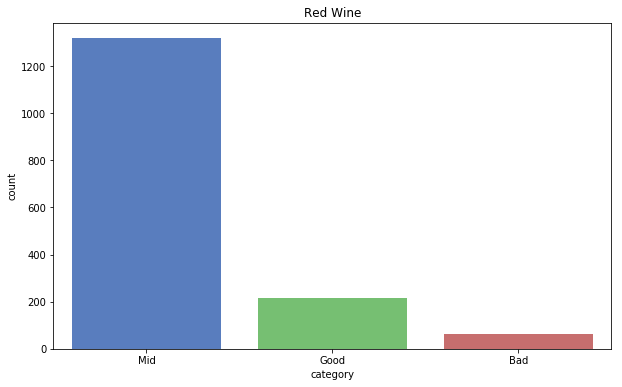

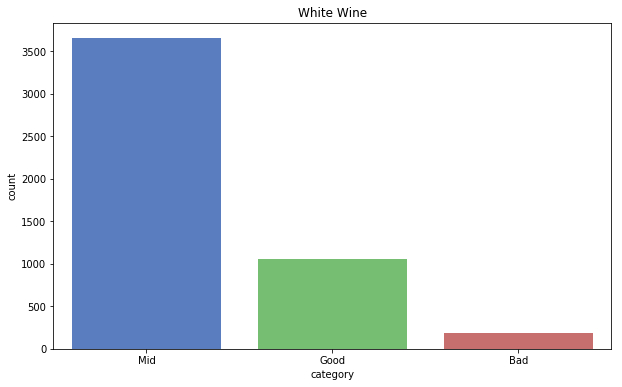

In [4]:
category_redwine = pd.DataFrame(data=category_redwine, columns=["category"])
data_redwine = pd.concat([redwine,category_redwine],axis=1)
data_redwine.drop(columns="quality",axis=1,inplace=True)
plt.figure(figsize=(10,6))
plt.title('Red Wine')
sns.countplot(data_redwine["category"],palette="muted")
data_redwine["category"].value_counts()

category_whitewine = pd.DataFrame(data=category_whitewine, columns=["category"])
data_whitwine = pd.concat([whitewine,category_whitewine],axis=1)
data_whitwine.drop(columns="quality",axis=1,inplace=True)
plt.figure(figsize=(10,6))
plt.title('White Wine')
sns.countplot(data_whitwine["category"],palette="muted")
data_whitwine["category"].value_counts()

### Heatmap for whole the Dataset

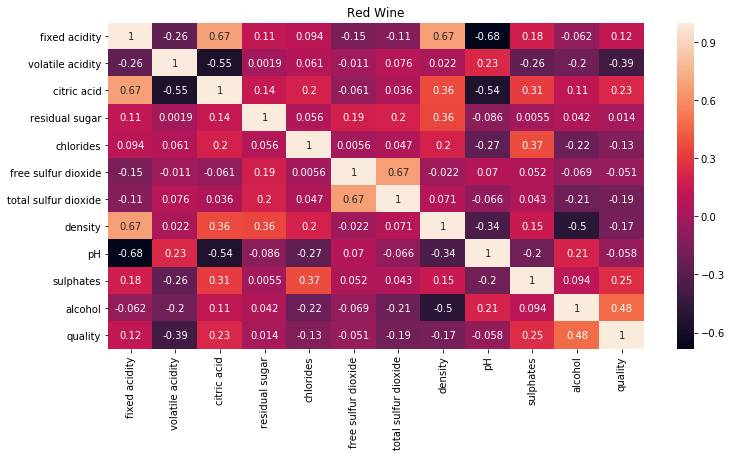

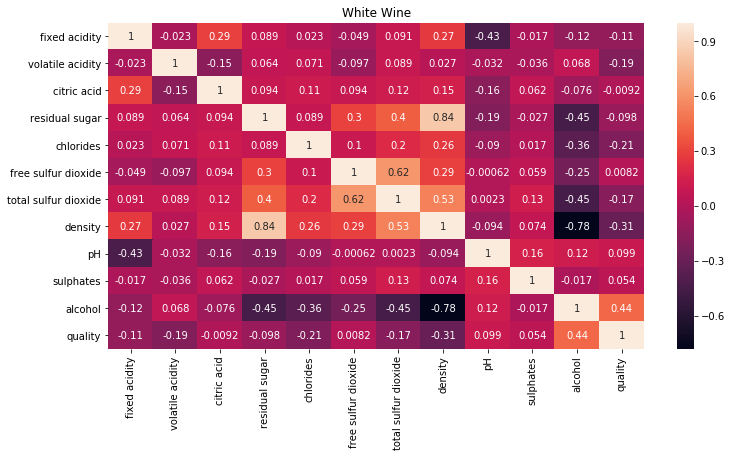

In [5]:
plt.figure(figsize=(12,6))
plt.title('Red Wine')
sns.heatmap(redwine.corr(),annot=True)

plt.figure(figsize=(12,6))
plt.title('White Wine')
sns.heatmap(whitewine.corr(),annot=True)


### Bar Plot for Quality

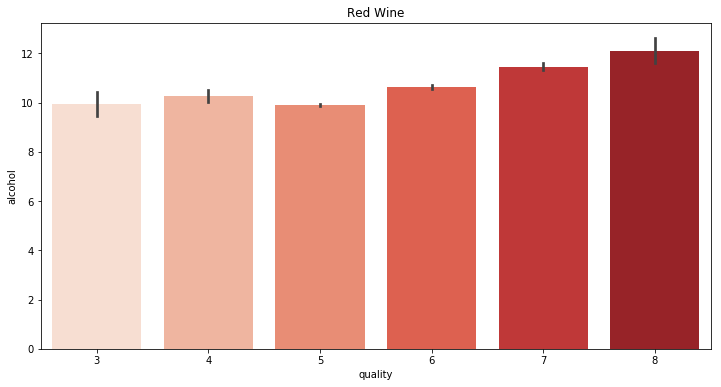

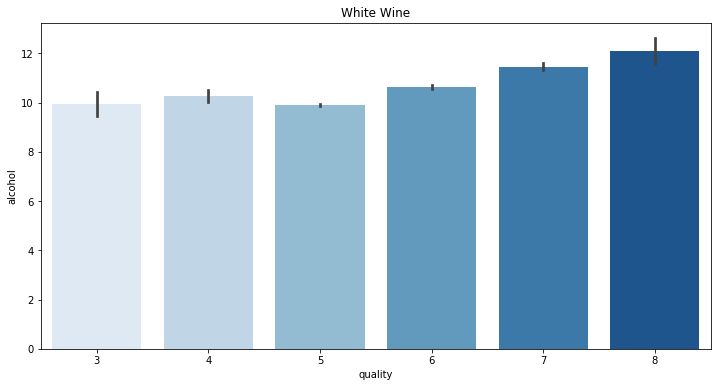

In [6]:
plt.figure(figsize=(12,6))
plt.title('Red Wine')
sns.barplot(x=redwine["quality"],y=redwine["alcohol"],palette="Reds")

plt.figure(figsize=(12,6))
plt.title('White Wine')
sns.barplot(x=redwine["quality"],y=redwine["alcohol"],palette="Blues")


### Joinplot for Density

Text(0.5,1,'White Wine')

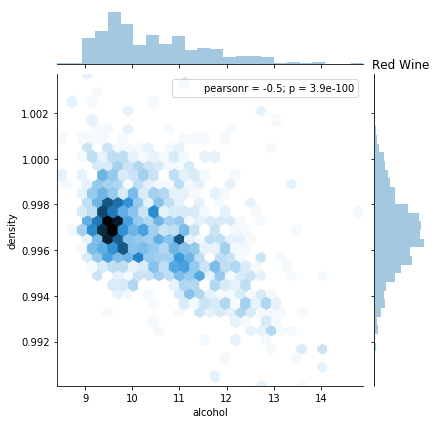

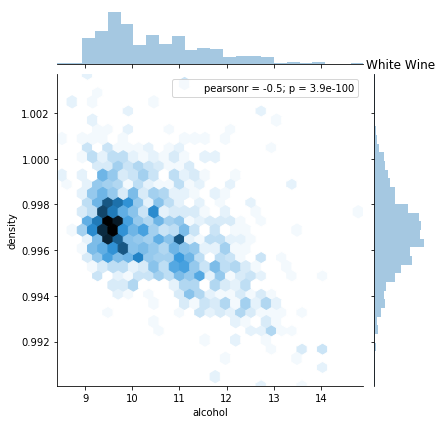

In [7]:

plt.figure(figsize=(12,6))
sns.jointplot(y=redwine["density"],x=redwine["alcohol"],kind="hex")
plt.title('Red Wine')


plt.figure(figsize=(12,6))
sns.jointplot(y=redwine["density"],x=redwine["alcohol"],kind="hex")
plt.title('White Wine')



###  Barplot Quality with fixed acidity

Text(0.5,1,'White Wine')

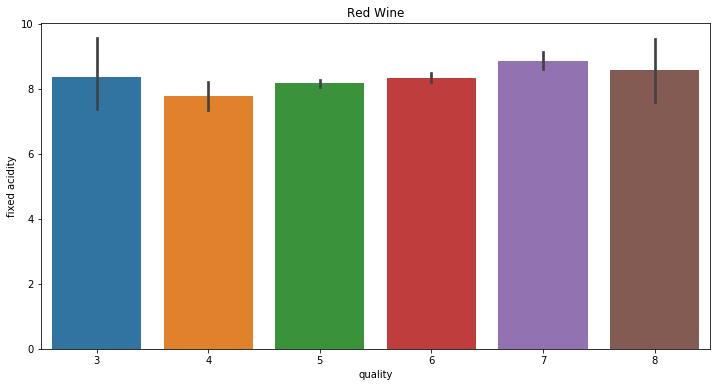

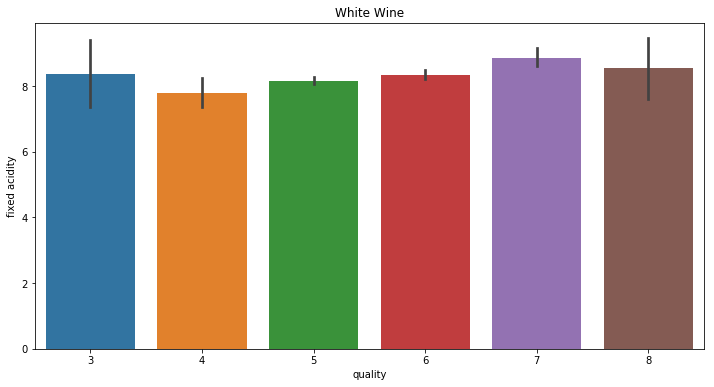

In [8]:

plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwine)
plt.title('Red Wine')


plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwine)
plt.title('White Wine')



## Splitting Dataset

In [32]:
from sklearn.cross_validation import train_test_split
X_train_red_wine, X_test_red_wine, Y_train_red_wine, Y_test_red_wine = train_test_split(X_redwine, Y_redwine, test_size = 0.20, random_state = 0)
X_train_white_wine, X_test_white_wine, Y_train_white_wine,Y_test_white_wine  = train_test_split(X_whitewine, Y_whitewine, test_size = 0.20, random_state = 0)


##  Random Forest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier_redwine_rmf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_redwine_rmf.fit(X_train_red_wine, Y_train_red_wine)
classifier_whitewine_rmf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_whitewine_rmf.fit(X_train_white_wine, Y_train_white_wine)
pred_redwine_rmf = classifier_redwine_rmf.predict(X_test_red_wine)
pred_whitewine_rmf = classifier_whitewine_rmf.predict(X_test_white_wine)


##  Feature Scalling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_red_wine = sc.fit_transform(X_train_red_wine)
X_test_red_wine = sc.transform(X_test_red_wine)
X_train_white_wine = sc.fit_transform(X_train_white_wine)
X_test_white_wine = sc.transform(X_test_white_wine)

##  KNearest Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier_redwine_kn = KNeighborsClassifier()
classifier_redwine_kn.fit(X_train_red_wine, Y_train_red_wine)
classifier_whitewine_kn = KNeighborsClassifier()
classifier_whitewine_kn.fit(X_train_white_wine, Y_train_white_wine)
pred_redwine_kn = classifier_redwine_kn.predict(X_test_red_wine)
pred_whitewine_kn = classifier_whitewine_kn.predict(X_test_white_wine)

## SVM

In [36]:
from sklearn.svm import SVC
classifier_redwine_svm = SVC()
classifier_redwine_svm.fit(X_train_red_wine, Y_train_red_wine)
classifier_whitewine_svm = SVC()
classifier_whitewine_svm.fit(X_train_white_wine, Y_train_white_wine)
pred_redwine_svm = classifier_redwine_svm.predict(X_test_red_wine)
pred_whitewine_svm = classifier_whitewine_svm.predict(X_test_white_wine)

## Using ANN

In [46]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y_whitewine_cat= labelencoder_y.fit_transform(Y_whitewine)
#  one hot encoding
from keras.utils import np_utils
Y_whitewine_cat = np_utils.to_categorical(Y_whitewine_cat)

labelencoder_y = LabelEncoder()
Y_redwine_cat= labelencoder_y.fit_transform(Y_redwine)
#  one hot encoding
from keras.utils import np_utils
Y_redwine_cat = np_utils.to_categorical(Y_redwine_cat)

In [47]:
X_train_red_wine, X_test_red_wine, Y_train_red_wine, Y_test_red_wine = train_test_split(X_redwine, Y_redwine_cat, test_size = 0.20, random_state = 0)
X_train_white_wine, X_test_white_wine, Y_train_white_wine,Y_test_white_wine  = train_test_split(X_whitewine, Y_whitewine_cat, test_size = 0.20, random_state = 0)


In [53]:
sc=StandardScaler()
X_train_red_wine = sc.fit_transform(X_train_red_wine)
X_test_red_wine = sc.transform(X_test_red_wine)
X_train_white_wine = sc.fit_transform(X_train_white_wine)
X_test_white_wine = sc.transform(X_test_white_wine)
print(Y_test_red_wine)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [57]:
# Initialising the ANN
classifier_redwine_ann = Sequential()
classifier_whitewine_ann = Sequential()

# Adding the input layer and the first hidden layer
classifier_redwine_ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim =11))
classifier_whitewine_ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier_redwine_ann.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
classifier_whitewine_ann.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier_redwine_ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier_whitewine_ann.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

# Compiling the ANN
classifier_redwine_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier_whitewine_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier_redwine_ann.fit(X_train_red_wine, Y_train_red_wine, batch_size = 10, epochs = 100)
classifier_whitewine_ann.fit(X_train_white_wine, Y_train_white_wine, batch_size = 10, epochs = 100)




Epoch 1/100
1279/1279 [==============================] - 1s 771us/step - loss: 0.2219 - acc: 0.4183
Epoch 2/100
1279/1279 [==============================] - 0s 242us/step - loss: 0.1222 - acc: 0.4277
Epoch 3/100
1279/1279 [==============================] - 0s 245us/step - loss: 0.1075 - acc: 0.4269
Epoch 4/100
1279/1279 [==============================] - 0s 267us/step - loss: 0.1037 - acc: 0.4543
Epoch 5/100
1279/1279 [==============================] - 0s 249us/step - loss: 0.0993 - acc: 0.5340
Epoch 6/100
1279/1279 [==============================] - 0s 249us/step - loss: 0.0955 - acc: 0.5575
Epoch 7/100
1279/1279 [==============================] - 0s 263us/step - loss: 0.0930 - acc: 0.5692
Epoch 8/100
1279/1279 [==============================] - 0s 247us/step - loss: 0.0918 - acc: 0.5606
Epoch 9/100
1279/1279 [==============================] - 0s 238us/step - loss: 0.0911 - acc: 0.5723
Epoch 10/100
1279/1279 [==============================] - 0s 279us/step - loss: 0.0905 - acc: 0.5692

Epoch 62/100
3918/3918 [==============================] - 1s 217us/step - loss: 0.0799 - acc: 0.5689
Epoch 63/100
3918/3918 [==============================] - 1s 206us/step - loss: 0.0798 - acc: 0.5717
Epoch 64/100
3918/3918 [==============================] - 1s 215us/step - loss: 0.0798 - acc: 0.5735
Epoch 65/100
3918/3918 [==============================] - 1s 211us/step - loss: 0.0798 - acc: 0.5699
Epoch 66/100
3918/3918 [==============================] - 1s 214us/step - loss: 0.0795 - acc: 0.5735
Epoch 67/100
3918/3918 [==============================] - 1s 234us/step - loss: 0.0797 - acc: 0.5679
Epoch 68/100
3918/3918 [==============================] - 1s 275us/step - loss: 0.0797 - acc: 0.5750
Epoch 69/100
3918/3918 [==============================] - 1s 278us/step - loss: 0.0795 - acc: 0.5671
Epoch 70/100
3918/3918 [==============================] - 1s 267us/step - loss: 0.0795 - acc: 0.5704
Epoch 71/100
3918/3918 [==============================] - 1s 271us/step - loss: 0.0795 - ac

In [60]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier_redwine_ann = Sequential()
    classifier_whitewine_ann = Sequential()
    # Adding the input layer and the first hidden layer
    classifier_redwine_ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim =11))
    classifier_whitewine_ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

    # Adding the second hidden layer
    classifier_redwine_ann.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
    classifier_whitewine_ann.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier_redwine_ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier_whitewine_ann.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

    # Compiling the ANN
    classifier_redwine_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
    classifier_whitewine_ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

    # Fitting the ANN to the Training set
    classifier_redwine_ann.fit(X_train_red_wine, Y_train_red_wine, batch_size = 10, epochs = 100)
    classifier_whitewine_ann.fit(X_train_white_wine, Y_train_white_wine, batch_size = 10, epochs = 100)
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search_redwine = grid_search.fit(X_train_red_wine, Y_train_red_wine)
grid_search_whitewine = grid_search.fit(X_white_red_wine, Y_white_red_wine)

best_parameters_redwine = grid_search_redwine.best_params_
best_accuracy_redwine = grid_search_redwine.best_score_

best_parameters_whitewine = grid_search_whitewine.best_params_
best_accuracy_whitewine = grid_search_whitewine.best_score_


Epoch 1/100
1279/1279 [==============================] - 1s 954us/step - loss: 0.2127 - acc: 0.4253
Epoch 2/100
1279/1279 [==============================] - 0s 278us/step - loss: 0.1147 - acc: 0.4269
Epoch 3/100
1279/1279 [==============================] - 0s 279us/step - loss: 0.1070 - acc: 0.4269
Epoch 4/100
1279/1279 [==============================] - 0s 277us/step - loss: 0.1036 - acc: 0.4496
Epoch 5/100
1279/1279 [==============================] - 0s 279us/step - loss: 0.0997 - acc: 0.5121
Epoch 6/100
1279/1279 [==============================] - 0s 311us/step - loss: 0.0959 - acc: 0.5457
Epoch 7/100
1279/1279 [==============================] - 0s 282us/step - loss: 0.0934 - acc: 0.5543
Epoch 8/100
1279/1279 [==============================] - 0s 280us/step - loss: 0.0920 - acc: 0.5598
Epoch 9/100
1279/1279 [==============================] - 0s 292us/step - loss: 0.0910 - acc: 0.5692
Epoch 10/100
1279/1279 [==============================] - 0s 285us/step - loss: 0.0906 - acc: 0.5676

1279/1279 [==============================] - 0s 252us/step - loss: 0.0821 - acc: 0.6325
Epoch 82/100
1279/1279 [==============================] - 0s 264us/step - loss: 0.0820 - acc: 0.6372
Epoch 83/100
1279/1279 [==============================] - 0s 290us/step - loss: 0.0819 - acc: 0.6403
Epoch 84/100
1279/1279 [==============================] - 0s 264us/step - loss: 0.0819 - acc: 0.6333
Epoch 85/100
1279/1279 [==============================] - 0s 265us/step - loss: 0.0818 - acc: 0.6341
Epoch 86/100
1279/1279 [==============================] - 0s 282us/step - loss: 0.0817 - acc: 0.6403
Epoch 87/100
1279/1279 [==============================] - 0s 266us/step - loss: 0.0816 - acc: 0.6349
Epoch 88/100
1279/1279 [==============================] - 0s 266us/step - loss: 0.0816 - acc: 0.6396
Epoch 89/100
1279/1279 [==============================] - 0s 294us/step - loss: 0.0816 - acc: 0.6372
Epoch 90/100
1279/1279 [==============================] - 0s 271us/step - loss: 0.0815 - acc: 0.6388
Epo

AttributeError: 'KerasClassifier' object has no attribute 'loss'

In [38]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
pred_redwine_ann = classifier_redwine_ann.predict(X_test_red_wine)
pred_whitewine_ann = classifier_whitewine_ann.predict(X_test_white_wine)

pred_redwine_cf = (pred_redwine_ann > 0.5)
pred_whitewine_cf = (pred_whitewine_ann>.5)

#accuracy using Confusion matrix
cm_redwine = accuracy_score(Y_test_red_wine, pred_redwine_cf,normalize=True)
cm_whitewine = accuracy_score(Y_test_white_wine,pred_whitewine_cf,normalize=True) 

## Result

In [39]:
# For Red Wine
conclusion_redwine = pd.DataFrame({'models': ["SVM","Random Forest","KNN"],
                                'accuracies for Red Wine(%)':[accuracy_score(Y_test_red_wine,pred_redwine_svm)*100,
                                                              accuracy_score(Y_test_red_wine,pred_redwine_rmf)*100,
                                                              accuracy_score(Y_test_red_wine,pred_redwine_kn)*100 ]})
conclusion_redwine



,accuracies for Red Wine(%),models
0,64.375,SVM
1,66.875,Random Forest
2,60.625,KNN


In [40]:
# For White Wine
conclusion_whitewine = pd.DataFrame({'models': ["SVM","Random Forest","KNN"],
                                   'accuracies for White Wine(%)': [accuracy_score(Y_test_white_wine,pred_whitewine_svm)*100,
                                                                accuracy_score(Y_test_white_wine,pred_whitewine_rmf)*100,
                                                                accuracy_score(Y_test_white_wine,pred_whitewine_kn)*100
                                                                ]})
conclusion_whitewine

,accuracies for White Wine(%),models
0,53.979592,SVM
1,62.857143,Random Forest
2,54.285714,KNN
